In [5]:
import os


os.makedirs('./bin',exist_ok=True)

In [6]:
import urllib.request


# Downloading model weights
urllib.request.urlretrieve("https://github.com/one-with-violets-in-her-lap/cifar-100-image-classification/releases/download/v0.1.0/resnet-18.pt", "./bin/resnet-18.pt")

('./bin/resnet-18.pt', <http.client.HTTPMessage at 0x7fbce41db6d0>)

In [13]:
# Downloading images to predict on
urllib.request.urlretrieve("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn.britannica.com%2F57%2F7057-050-33CEB562%2FBactrian-camel.jpg&f=1&nofb=1&ipt=26eec847d189d139272e43bd6e0c635e4a2116d8e120c90bcdd1f6bc0060693a&ipo=images", "./camel.jpg")
urllib.request.urlretrieve("https://upload.wikimedia.org/wikipedia/commons/4/41/Left_side_of_Flying_Pigeon.jpg", "./bicycle.jpg")
urllib.request.urlretrieve("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2Fc%2Fc4%2FSavannah_Cat_portrait.jpg%2F1200px-Savannah_Cat_portrait.jpg&f=1&nofb=1&ipt=180ba30e35574127827a010c74cd85eccc32979c97642e2c70e10f64935a0d63&ipo=images", "./cat.jpg")

('./cat.jpg', <http.client.HTTPMessage at 0x7fbba37fd6c0>)

In [15]:
from matplotlib import pyplot as plt
from PIL import Image

from image_classifier.research.lib.arbitrary_image_inference import classify_image
from image_classifier.data.cifar_100 import cifar_100_test_dataset


def predict_image_class(image_path: str):
  image = Image.open(image_path).convert("RGB")

  image_predicted_class_index = classify_image(
    image,
    "cuda",
    "./bin/resnet-18.pt",
  )

  predicted_class = cifar_100_test_dataset.classes[image_predicted_class_index]

  plt.figure(figsize=(14, 6))
  plt.imshow(image)
  plt.title(f"{image_predicted_class_index} - prediction: {predicted_class}")
  plt.show()

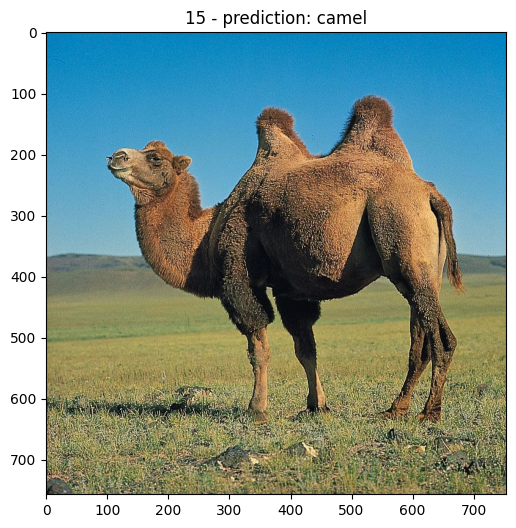

In [16]:
predict_image_class('./camel.jpg')

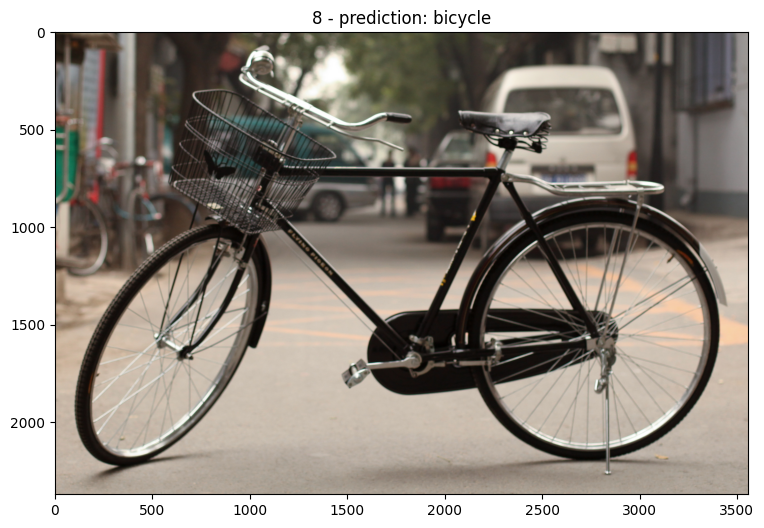

In [17]:
predict_image_class('./bicycle.jpg')

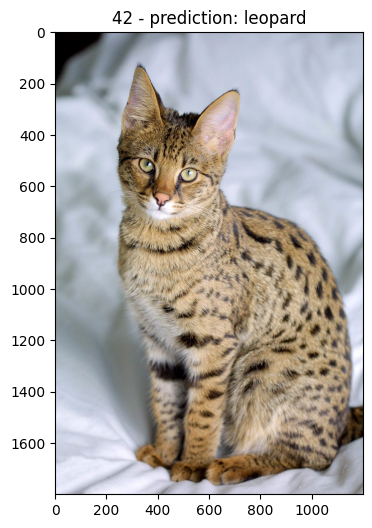

In [18]:
predict_image_class('./cat.jpg')

I doubt that the image above is a leopard. Apparently, the model is bad at classifying cats. I will plot a confusion matrix later to make it more transparent